Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Strojno učenje 2016./2017.

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

### Laboratorijska vježba 2: Linearni diskriminativni modeli i logistička regresija

(c) 2015-2016 Jan Šnajder, Domagoj Alagić

<i>Verzija: 0.2</i> <br/>
<i>Zadnji put ažurirano: 26. listopada 2016.</i> 

Objavljeno: **26. listopada 2016.**<br>
Rok za predaju: U terminu vježbe u tjednu od **31. listopada 2016.**

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. Kako bi kvalitetnije, ali i na manje zamoran način usvojili gradivo ovog kolegija, potrudili smo se uključiti tri vrste zadataka: **1)** implementacija manjih algoritama, modela ili postupaka; **2)** eksperimenti s raznim modelima te njihovim hiperparametrima, te **3)** primjena modela na (stvarnim) podatcima. Ovim zadatcima pokrivamo dvije paradigme učenja: učenje izgradnjom (engl. *learning by building*) i učenje eksperimentiranjem (engl. *learning by experimenting*).

U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [33]:
# Učitaj osnovne biblioteke...
import scipy as np
import scipy as sp
import sklearn
#import mlutils
import matplotlib.pyplot as plt
%pylab inline
from sklearn.preprocessing import PolynomialFeatures

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $+1$, dok za pozitivne primjere predviđa vrijednost $-1$. U tom slučaju, funkcija $f(\mathbf{x})=0$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u našem paketu `mlutils` (`mlutils.py`). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela. 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojim podatcima.


In [34]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.02  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.Paired, marker='o', s=50);

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [35]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, -1, -1, -1])

1.0


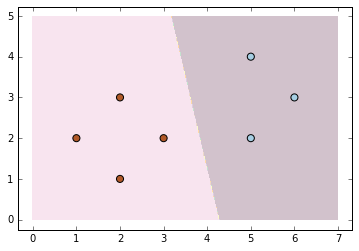

In [36]:
model = RidgeClassifier().fit(seven_X,seven_y)
y_predict = model.predict(seven_X)
print(accuracy_score(seven_y, y_predict))
plot_2d_clf_problem(seven_X,seven_y,lambda x: model.predict(x) >= 0)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0`.

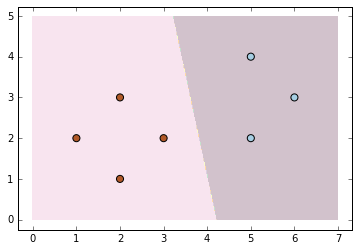

In [37]:
linearModel = LinearRegression().fit(seven_X,seven_y)
y_predict_linear = linearModel.predict(seven_X)
plot_2d_clf_problem(seven_X,seven_y,lambda x: linearModel.predict(x) >= 0)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $0$ i $1$ umjesto $-1$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [38]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, -1)

0.875


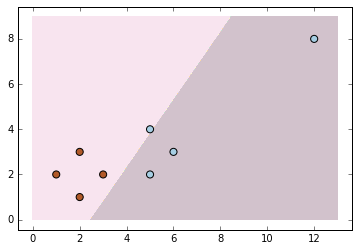

In [39]:
model = RidgeClassifier().fit(outlier_X,outlier_y)
print(accuracy_score(outlier_y, model.predict(outlier_X)))
plot_2d_clf_problem(outlier_X,outlier_y,lambda x: model.predict(x) >= 0)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [40]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, -1)

0.875


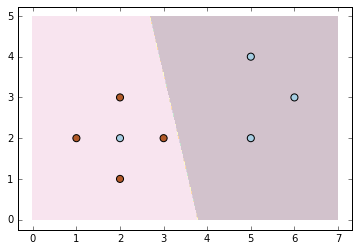

In [41]:
model = RidgeClassifier().fit(unsep_X,unsep_y)
print(accuracy_score(unsep_y, model.predict(unsep_X)))
plot_2d_clf_problem(unsep_X ,unsep_y,lambda x: model.predict(x) >= 0)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Zašto?

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki da je svaka od klasa "zbijena" u jednu grupu.

In [42]:
from sklearn.datasets import make_classification

def plot_2d_clf_problem_subplot(X, y, subplot_counter,title, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.02  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(map(h,XX))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.subplot(subplot_counter)
        plt.title(title)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.Paired, marker='o', s=50);

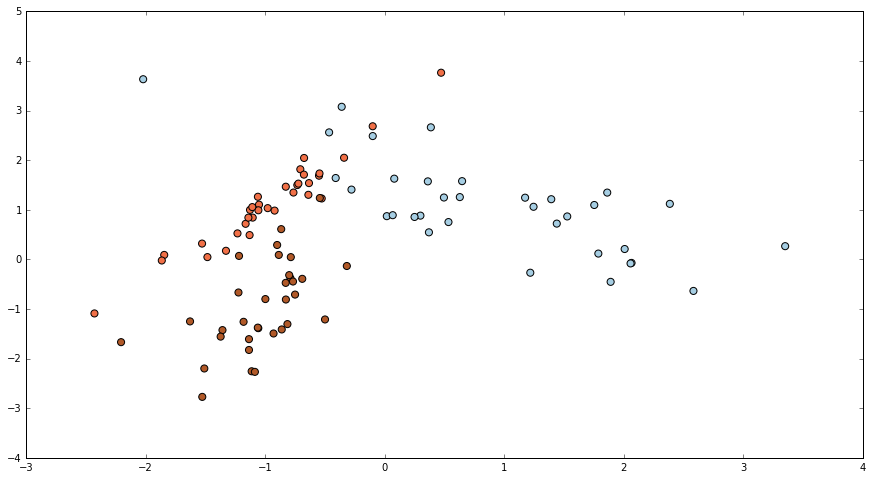

In [43]:
plt.figure(figsize=(15,8))
x_make_class, y_make_class = make_classification(n_features=2, n_redundant=0,n_informative=2,
                             n_clusters_per_class=1, n_classes=3)
plot_2d_clf_problem(x_make_class, y_make_class)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$ i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema je one-vs-one (OVO). Koja je prednost sheme OVR nad shemom OVO?

0.87
1.0


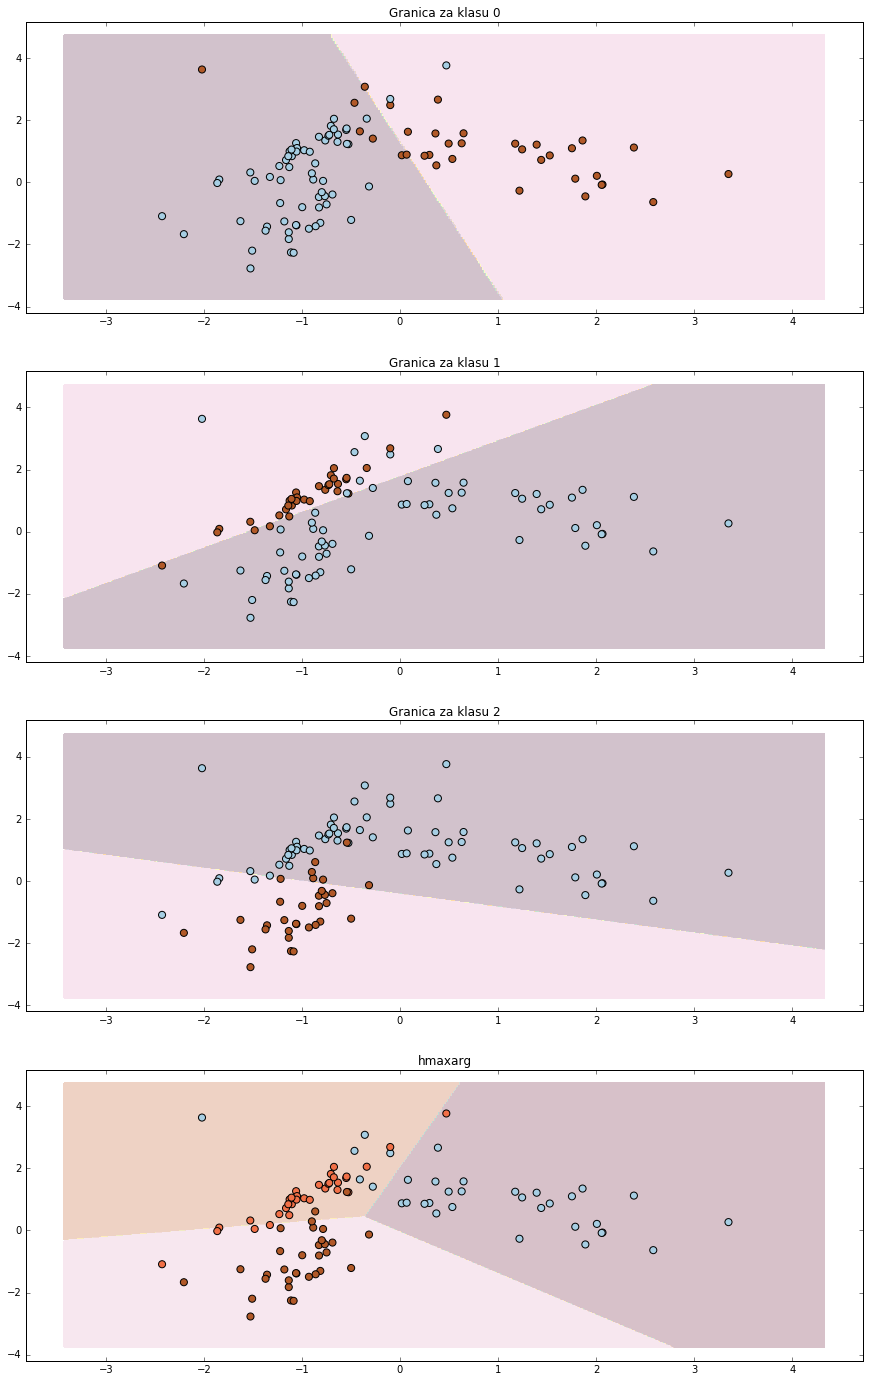

In [44]:
plt.figure(figsize=(15,24))

y_class0 = np.asarray(list(map(lambda x: 1 if x == 0 else -1, y_make_class)))
y_class1 = np.asarray(list(map(lambda x: 1 if x == 1 else -1, y_make_class)))
y_class2 = np.asarray(list(map(lambda x: 1 if x == 2 else -1, y_make_class)))

model_class0 = LinearRegression().fit(x_make_class,y_class0)
model_class1 = LinearRegression().fit(x_make_class,y_class1)
model_class2 = LinearRegression().fit(x_make_class,y_class2)


def argmax_function(x):
    epsilon = 1e-5
    prob_x_0 = model_class0.predict(x.reshape(1,-1))
    prob_x_1 = model_class1.predict(x.reshape(1,-1))
    prob_x_2 = model_class2.predict(x.reshape(1,-1))
    max_prob = max(prob_x_0, prob_x_1,  prob_x_2)
    predictedClass = 0
    if abs(max_prob-prob_x_0)<epsilon:
        predictedClass = 0
    elif abs(max_prob-prob_x_1)<epsilon:
        predictedClass = 1
    else:
        predictedClass = 2
    return predictedClass

epsilon = 1e-5
hmax = []
for x_example in x_make_class:
    prob_x_0 = model_class0.predict(x_example.reshape(1,-1))
    prob_x_1 = model_class1.predict(x_example.reshape(1,-1))
    prob_x_2 = model_class2.predict(x_example.reshape(1,-1))
    max_prob = max(prob_x_0, prob_x_1,  prob_x_2)
    predictedClass = 0
    #print(max_prob)
    if abs(max_prob-prob_x_0)<epsilon:
        predictedClass = 0
    elif abs(max_prob-prob_x_1)<epsilon:
        predictedClass = 1
    else:
        predictedClass = 2
    hmax.append(predictedClass)




#y_class0_hmax = np.asarray(list(map(lambda x: 1 if x == 0 else -1, np.asarray(hmax))))
#y_class1_hmax = np.asarray(list(map(lambda x: 1 if x == 1 else -1, np.asarray(hmax))))
#y_class2_hmax = np.asarray(list(map(lambda x: 1 if x == 2 else -1, np.asarray(hmax))))

#model_class0_hmax = LinearRegression().fit(x_make_class,y_class0_hmax)
#model_class1_hmax = LinearRegression().fit(x_make_class,y_class1_hmax)
#model_class2_hmax = LinearRegression().fit(x_make_class,y_class2_hmax)

plot_2d_clf_problem_subplot(x_make_class, y_class0, 411,"Granica za klasu 0",lambda x: model_class0.predict(x) >= 0)
plot_2d_clf_problem_subplot(x_make_class, y_class1, 412,"Granica za klasu 1",lambda x: model_class1.predict(x) >= 0)
plot_2d_clf_problem_subplot(x_make_class, y_class2, 413,"Granica za klasu 2",lambda x: model_class2.predict(x) >= 0)

#plot_2d_clf_problem_subplot(x_make_class, y_class0_hmax, 422,"Granica za klasu 0 - hmax",lambda x: model_class0_hmax.predict(x) >= 0)
#plot_2d_clf_problem_subplot(x_make_class, y_class1_hmax, 424,"Granica za klasu 1 - hmax",lambda x: model_class1_hmax.predict(x) >= 0)
#plot_2d_clf_problem_subplot(x_make_class, y_class2_hmax, 426,"Granica za klasu 2 - hmax",lambda x: model_class2_hmax.predict(x) >= 0)
plot_2d_clf_problem_subplot(x_make_class, y_make_class, 414,"hmaxarg",lambda x: argmax_function(x))
model_ridgeClass = RidgeClassifier().fit(x_make_class, y_make_class)

print(accuracy_score(y_make_class, np.asarray(hmax)))
print(accuracy_score(np.asarray(hmax), model_ridgeClass.predict(x_make_class)))

#plot_2d_clf_problem_subplot(x_make_class, y_make_class, 427,"Granica za klasu 0 - RidgeClassifier")
#y_pred = model_class1.predict(x_make_class[3])
#print(y_make_class[3])
#print(y_pred)
#print(1e-5)

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

In [45]:
def sigm(x):
    return 1/(1+np.exp(-x))

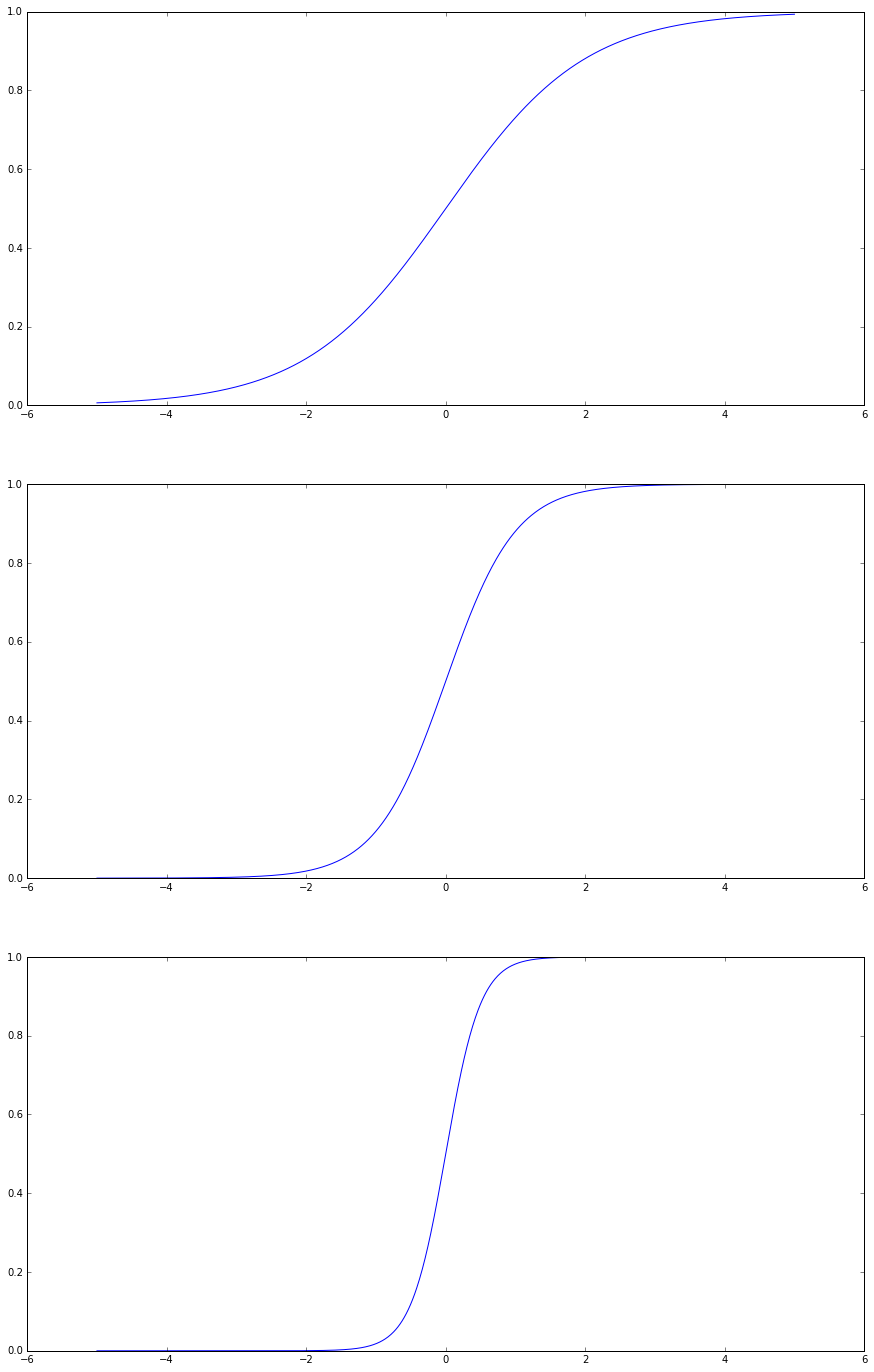

In [46]:
plt.figure(figsize=(15,24))
x = np.linspace(-5,5,1000)
plt.subplot(311)
plt.plot(x,sigm(x))
plt.subplot(312)
plt.plot(x,sigm(2*x))
plt.subplot(313)
plt.plot(x,sigm(4*x))

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o magnitudi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Definirajte pomoćnu funkciju `lr_h(x,w)` koja daje predikciju (izlaz modela) za primjer `x` uz zadane težine `w`.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu. Prilagodite algoritam ili jednostavno redefinirajte oznake u skupu `seven`.

In [47]:
from sklearn.metrics import metrics
def cross_entropy_error_func(X,y,w):
    w_transpose = w.transpose()
    temp = np.dot(w,X.transpose())
    predict_value = sigm(temp)
    return metrics.log_loss(y,predict_value)


def lr_h(x,w):
    return sigm(w[0] + np.dot(x, w[1:]))


def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    weights = np.array([0,0,0])
    w = np.zeros(X.shape[1] + 1)
    N = X.shape[0]
    w0 = 0
    poly = PolynomialFeatures(1)
    design_matrix = poly.fit_transform(X)
    cross_entropy_error_previous_iteration = 0;
    for i in range(max_iter):
        cross_entropy_error = 0
        deltaw = np.zeros(X.shape[1])
        deltaw0 = 0
        for j in range (0,N):
            h = lr_h(X[j],w)
            deltaw0 = deltaw0+h-y[j]
            deltaw = deltaw + np.dot((h-y[j]),X[j])
        w[0] = w[0] - eta * deltaw0
        w[1:] = w[1:] * (1 - eta * alpha) - eta * deltaw
        cross_entropy_error = cross_entropy_error_func(design_matrix,y,w)
        np.dot(w[1:].transpose(),w[1:])
        cross_entropy_error = cross_entropy_error + (alpha * np.dot(w[1:].transpose(),w[1:]))/N
        if abs(cross_entropy_error-cross_entropy_error_previous_iteration) <= epsilon:
            print(cross_entropy_error_previous_iteration)
            print(cross_entropy_error)
            print(i+1)
            break      
        cross_entropy_error_previous_iteration = cross_entropy_error 
        w0_arr = np.array((w0))
        w_array = np.append(w0_arr,w)
        weights = np.vstack((weights,w))
    # w0 = np.array((w0))
    #w_array = np.append(w0,w)
    
    if trace:
        return w,weights 
    else:
        return w

#### (c)

Definirajte funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` koristeći dane težine `w`. Možete iskoristiti funkciju [`metrics.log_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html).

In [48]:
from sklearn.metrics import metrics
def cross_entropy_error_func(X,y,w):
    w_transpose = w.transpose()
    temp = np.dot(w,X.transpose())
    predict_value = sigm(temp)
    return metrics.log_loss(y,predict_value)
#print(cross_entropy_error(seven_X, seven_y, w))

#### (d)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije.

0.135318658609
0.135218727202
947
[-1.71089242  0.68413507]
4.45449454204
[ 4.45449454 -1.71089242  0.68413507]
[0.84772197693020424, 0.95627455740541933, 0.98388680366592296, 0.66598637546834327, 0.061128672458988828, 0.20368384666816292, 0.022788329130492512]
0.135218727202
[1, 1, 1, 1, 0, 0, 0]


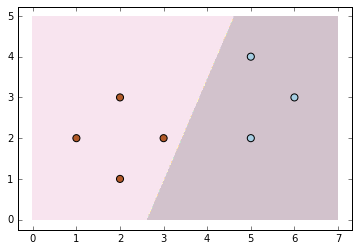

In [49]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])
gradient_w = lr_train(seven_X,seven_y,0.01,2000,0,0.0001,False)

def fun(x):
    temp = np.dot(w.transpose(),x)+w0
    y_predict = sigm(temp)
    if(y_predict>=0.5):
        return 1
    else:
        return 0
    
y_predicted_values = []
w = gradient_w[1:3]
w0 = gradient_w[0]
print(w)
print(w0)
print(gradient_w)
for x_example in seven_X:
    temp = np.dot(w.transpose(),x_example)+w0
    y_predict = sigm(temp)
    y_predicted_values.append(y_predict)
print(y_predicted_values)
poly = PolynomialFeatures(1)
design_matrix = poly.fit_transform(seven_X)
#model_ridgeClass = RidgeClassifier().fit(seven_X, y_class_gradient)
h_gradient = sigm(np.dot(gradient_w,design_matrix.transpose()))
y_class_gradient = list(map(lambda x: 1 if x >= 0.5 else 0, h_gradient))


temp = np.dot(gradient_w,design_matrix.transpose())
h = sigm(temp)
#h = lr_h(design_matrix,gradient_w)
greska_entropije = metrics.log_loss(seven_y,h)
print(greska_entropije)
print(y_class_gradient)
plot_2d_clf_problem(seven_X ,seven_y,lambda x: fun(x))

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu (o kojim parametrima) to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (e)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Za izračun pogreške možete koristiti funkciju [`metrics.zero_one_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.zero_one_loss.html#sklearn.metrics.zero_one_loss). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [50]:
from sklearn.metrics import zero_one_loss

0.135318658609
0.135218727202
947
0.188526338508
0.188426376421
1142
0.135318658609
0.135218727202
947
0.0638996458086
0.0637998604986
511
0.0461444499625
0.0460447086902
378


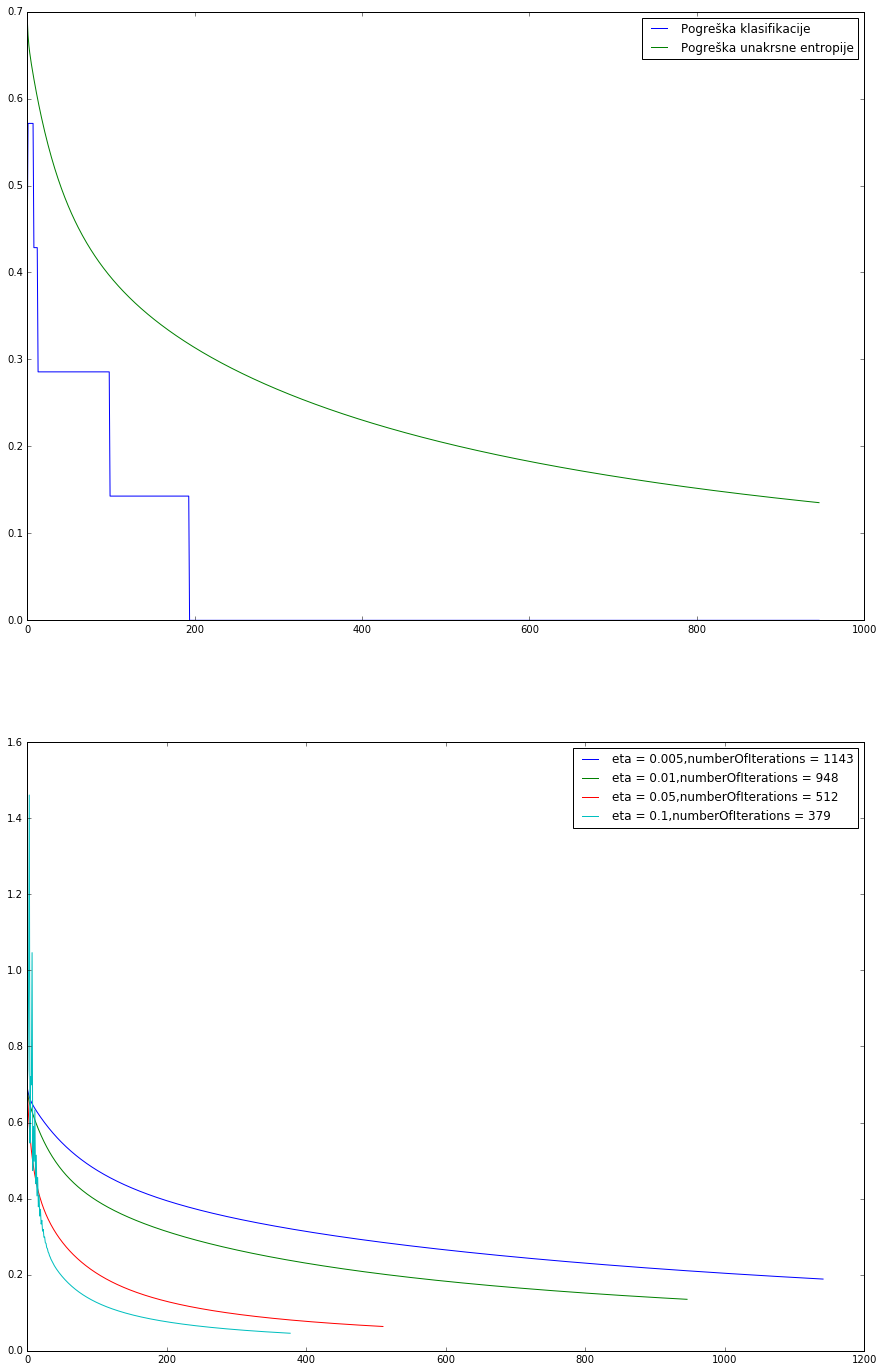

In [51]:
plt.figure(figsize=(15,24))
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])
poly = PolynomialFeatures(1)
design_matrix = poly.fit_transform(seven_X)
gradient_w,weights = lr_train(seven_X,seven_y,0.01,2000,0,0.0001,True)

list_iter = []
list_class_error = []
list_cross_error = []
iter = 0
for weight in weights:
    h = sigm(np.dot(weight,design_matrix.transpose()))
    y_class_weight = list(map(lambda x: 1 if x >= 0.5 else 0, h))
    classification_error = zero_one_loss(seven_y, y_class_weight, normalize=True)
    list_iter.append(iter)
    list_class_error.append(classification_error)
    list_cross_error.append(metrics.log_loss(seven_y,h))
    iter = iter+1

plt.subplot(211)
plt.plot(np.asarray(list_iter),np.asarray(list_class_error),label="Pogreška klasifikacije")
plt.plot(np.asarray(list_iter),np.asarray(list_cross_error),label="Pogreška unakrsne entropije")
legend()   

plt.subplot(212)
etas = [0.005,0.01,0.05,0.1]
for eta in etas:
    gradient_w,weights = lr_train(seven_X,seven_y,eta,2000,0,0.0001,True)
    list_eta_cross_error = []
    list_iter = []
    iter = 0
    for weight in weights:
        h = sigm(np.dot(weight,design_matrix.transpose()))
        list_eta_cross_error.append(metrics.log_loss(seven_y,h))
        list_iter.append(iter)
        iter = iter + 1
    plt.plot(np.asarray(list_iter),np.asarray(list_eta_cross_error), label='eta = {0},numberOfIterations = {1}'.format(eta,iter+1))
legend()   
plt.show()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (f)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije načine optimizacije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale.

[ 0.79940576]
[[-0.60801868  0.44288108]]
[1 1 1 0 0 0 0]


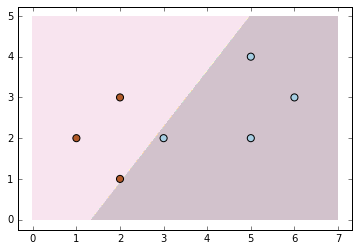

In [52]:
from sklearn.linear_model import LogisticRegression
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])
modelLogisticRegression = LogisticRegression().fit(seven_X,seven_y)
print(modelLogisticRegression.intercept_)
print(modelLogisticRegression.coef_)
print(modelLogisticRegression.predict(seven_X))
plot_2d_clf_problem(seven_X ,modelLogisticRegression.predict(seven_X),lambda x: modelLogisticRegression.predict(x) >= 0.5)

### 4. Analiza logističke regresije

#### (a)

Provjerite kako se logistička nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

0.126069924172
0.125970013458
843


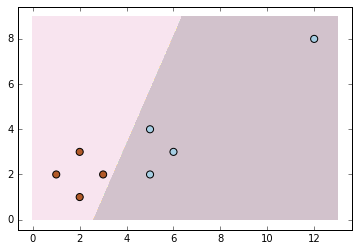

In [53]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)
gradient_w = lr_train(outlier_X,outlier_y,0.01,2000,0,0.0001,False)
w = gradient_w[1:3]
w0 = gradient_w[0]
def fun(x):
    temp = np.dot(w.transpose(),x)+w0
    y_predict = sigm(temp)
    if(y_predict>=0.5):
        return 1
    else:
        return 0
plot_2d_clf_problem(outlier_X, outlier_y,lambda x: fun(x) >= 0.5)



**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


0.135318658609
0.135218727202
947


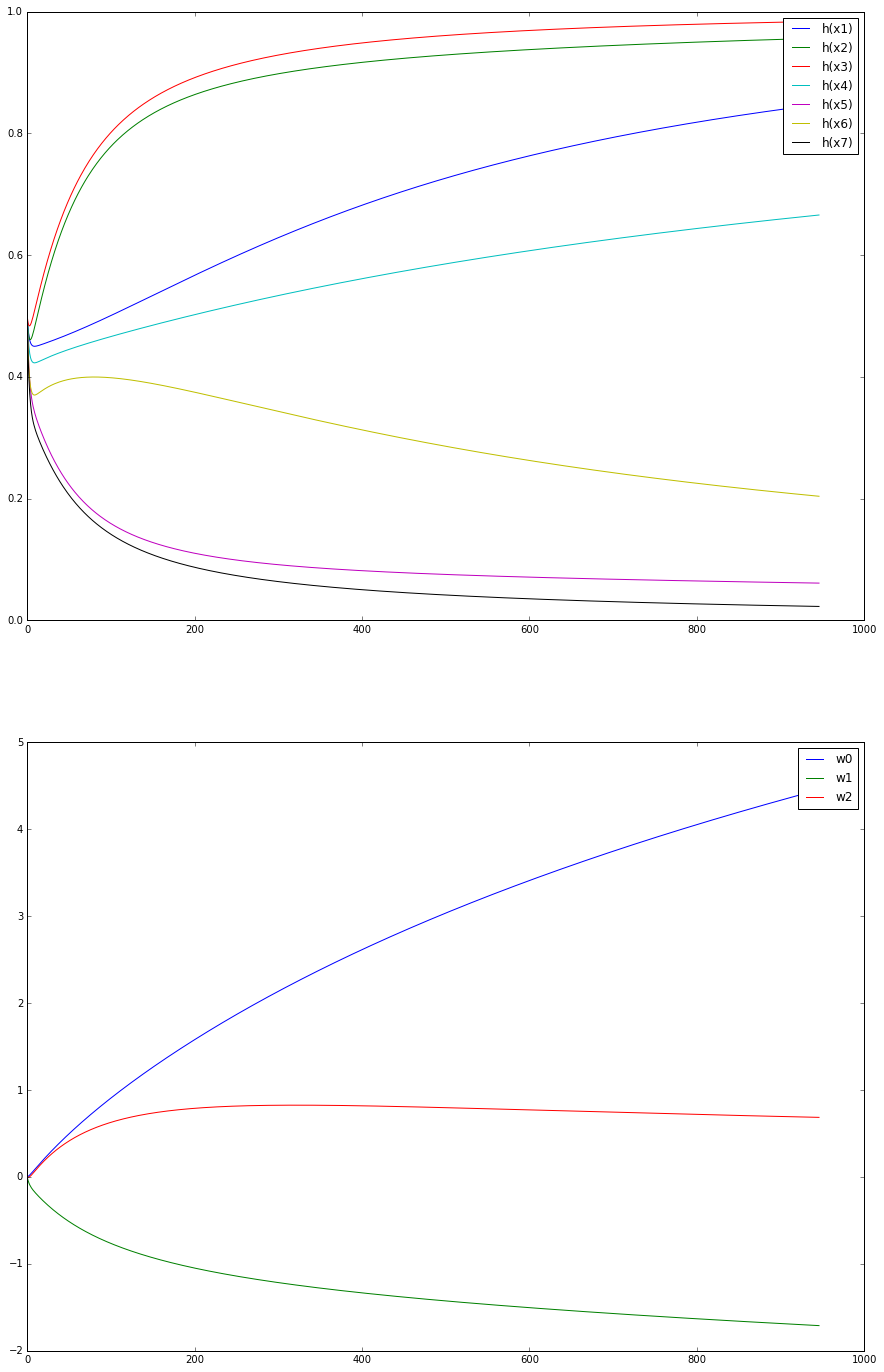

In [56]:
plt.figure(figsize=(15,24))
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])
poly = PolynomialFeatures(1)
design_matrix = poly.fit_transform(seven_X)
gradient_w,weights = lr_train(seven_X,seven_y,0.01,2000,0,0.0001,True)

list_iter = []
list_hx1 = []
list_hx2 = []
list_hx3 = []
list_hx4 = []
list_hx5 = []
list_hx6 = []
list_hx7 = []
iter = 0
list_w0 = []
list_w1 = []
list_w2 = []
for weight in weights:
    h = sigm(np.dot(weight,design_matrix.transpose()))
    list_iter.append(iter)
    iter = iter + 1
    list_hx1.append(h[0])
    list_hx2.append(h[1])
    list_hx3.append(h[2])
    list_hx4.append(h[3])
    list_hx5.append(h[4])
    list_hx6.append(h[5])
    list_hx7.append(h[6])
    list_w0.append(weight[0])
    list_w1.append(weight[1])
    list_w2.append(weight[2])
plt.subplot(211)
plt.plot(np.asarray(list_iter),np.asarray(list_hx1),label="h(x1)")
plt.plot(np.asarray(list_iter),np.asarray(list_hx2),label="h(x2)")
plt.plot(np.asarray(list_iter),np.asarray(list_hx3),label="h(x3)")
plt.plot(np.asarray(list_iter),np.asarray(list_hx4),label="h(x4)")
plt.plot(np.asarray(list_iter),np.asarray(list_hx5),label="h(x5)")
plt.plot(np.asarray(list_iter),np.asarray(list_hx6),label="h(x6)")
plt.plot(np.asarray(list_iter),np.asarray(list_hx7),label="h(x7)")
legend()

plt.subplot(212)
plt.plot(np.asarray(list_iter),np.asarray(list_w0),label="w0")
plt.plot(np.asarray(list_iter),np.asarray(list_w1),label="w1")
plt.plot(np.asarray(list_iter),np.asarray(list_w2),label="w2")

legend()
plt.show()

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

0.406452419646
0.406352684514
454


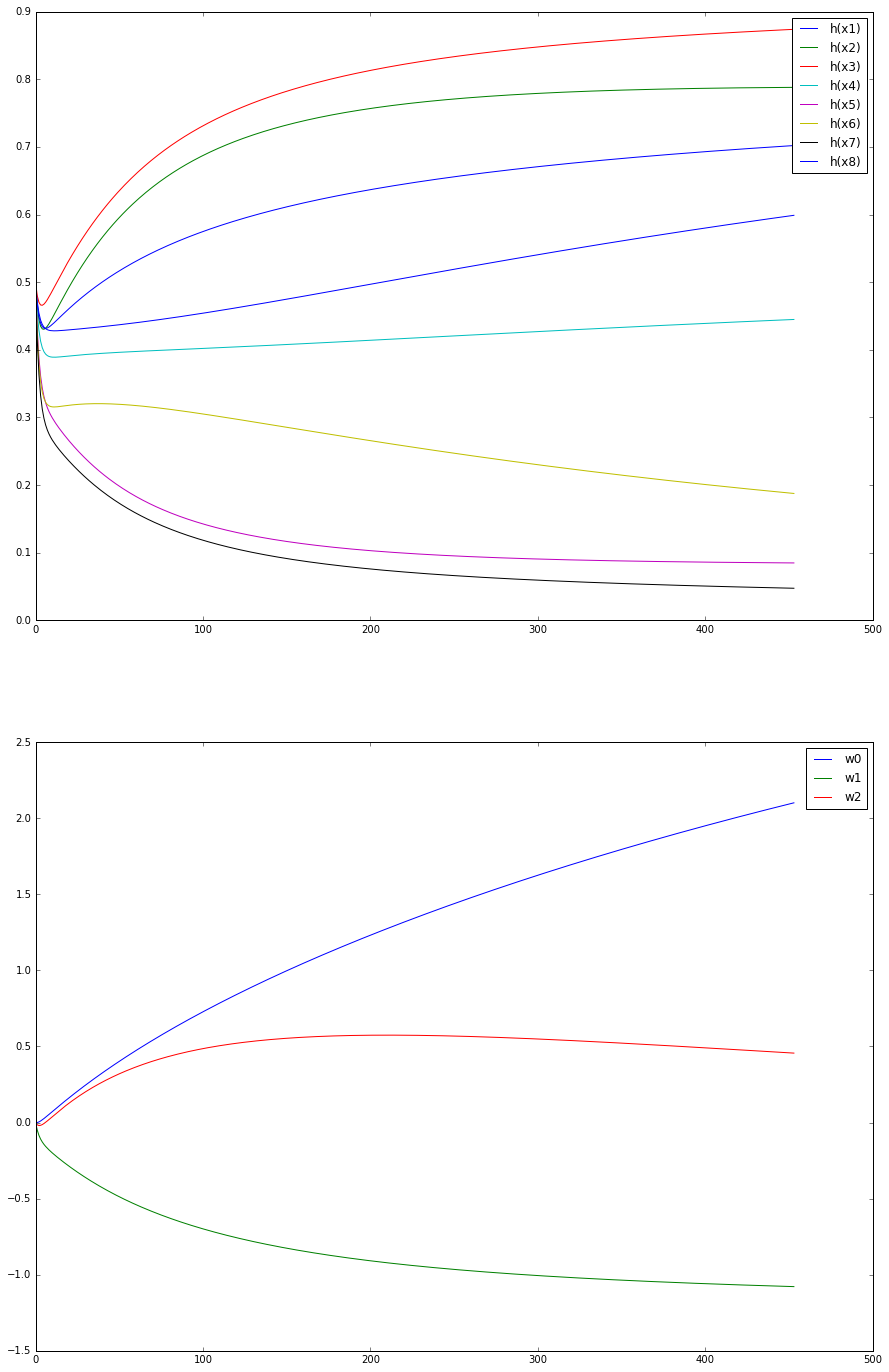

In [57]:
plt.figure(figsize=(15,24))
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)
poly = PolynomialFeatures(1)
design_matrix = poly.fit_transform(unsep_X)
gradient_w,weights = lr_train(unsep_X,unsep_y,0.01,2000,0,0.0001,True)

list_iter = []
list_hx1 = []
list_hx2 = []
list_hx3 = []
list_hx4 = []
list_hx5 = []
list_hx6 = []
list_hx7 = []
list_hx8 = []
iter = 0
list_w0 = []
list_w1 = []
list_w2 = []
for weight in weights:
    h = sigm(np.dot(weight,design_matrix.transpose()))
    list_iter.append(iter)
    iter = iter + 1
    list_hx1.append(h[0])
    list_hx2.append(h[1])
    list_hx3.append(h[2])
    list_hx4.append(h[3])
    list_hx5.append(h[4])
    list_hx6.append(h[5])
    list_hx7.append(h[6])
    list_hx8.append(h[7])
    list_w0.append(weight[0])
    list_w1.append(weight[1])
    list_w2.append(weight[2])
plt.subplot(211)
plt.plot(np.asarray(list_iter),np.asarray(list_hx1),label="h(x1)")
plt.plot(np.asarray(list_iter),np.asarray(list_hx2),label="h(x2)")
plt.plot(np.asarray(list_iter),np.asarray(list_hx3),label="h(x3)")
plt.plot(np.asarray(list_iter),np.asarray(list_hx4),label="h(x4)")
plt.plot(np.asarray(list_iter),np.asarray(list_hx5),label="h(x5)")
plt.plot(np.asarray(list_iter),np.asarray(list_hx6),label="h(x6)")
plt.plot(np.asarray(list_iter),np.asarray(list_hx7),label="h(x7)")
plt.plot(np.asarray(list_iter),np.asarray(list_hx8),label="h(x8)")
legend()

plt.subplot(212)
plt.plot(np.asarray(list_iter),np.asarray(list_w0),label="w0")
plt.plot(np.asarray(list_iter),np.asarray(list_w1),label="w1")
plt.plot(np.asarray(list_iter),np.asarray(list_w2),label="w2")

legend()
plt.show()

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

0.135318658609
0.135218727202
947
0.349976352344
0.349876402095
536
0.60023073056
0.600131383348
138
0.679400070549
0.679301995194
44
0.135318658609
0.135218727202
947
0.349976352344
0.349876402095
536
0.60023073056
0.600131383348
138
0.679400070549
0.679301995194
44


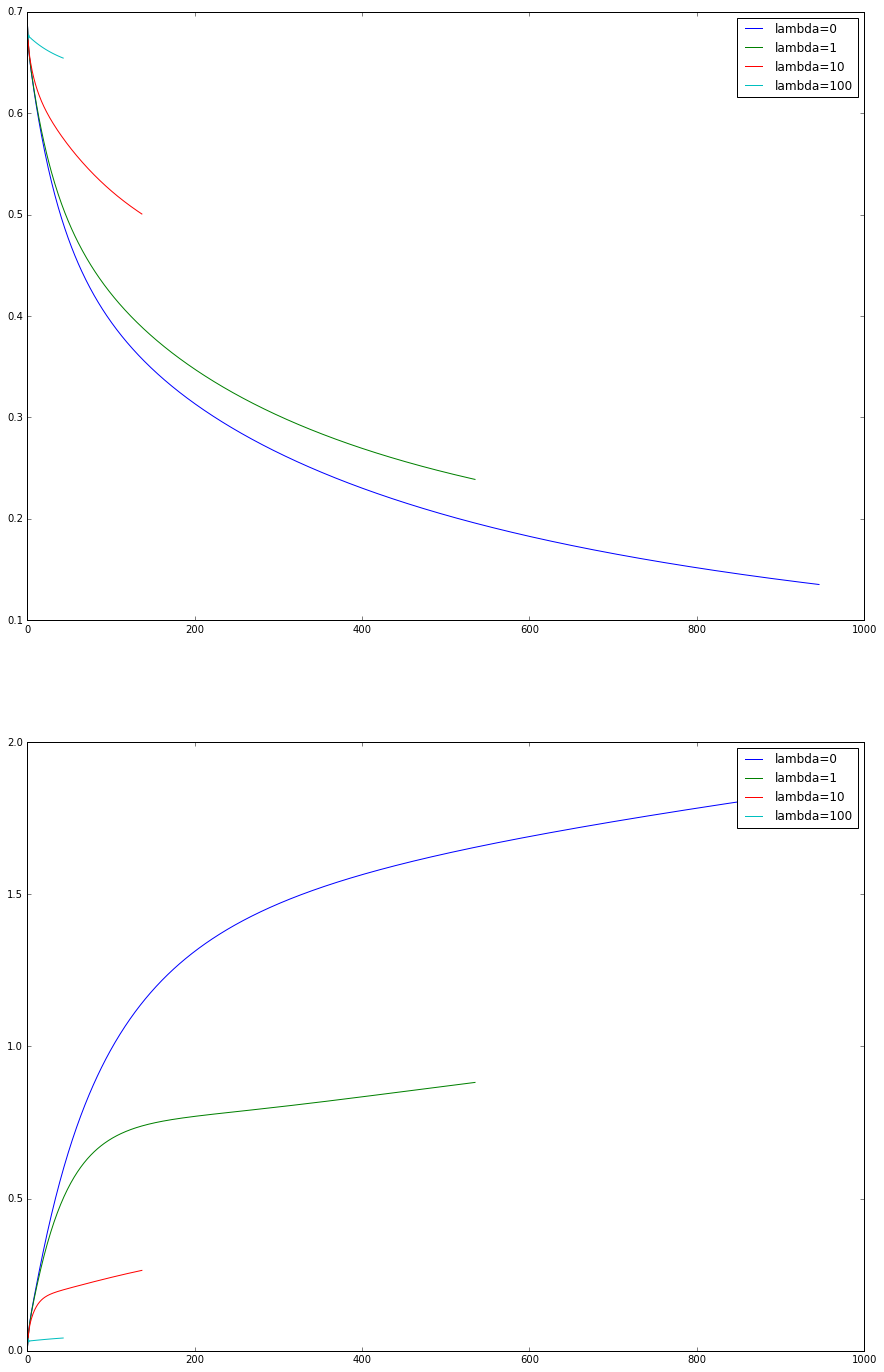

In [58]:
from numpy import linalg
plt.figure(figsize=(15,24))
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])
poly = PolynomialFeatures(1)
design_matrix = poly.fit_transform(seven_X)
lambdas = [0,1,10,100]


plt.subplot(211)
for lam in lambdas:
    list_iter = []
    list_cross_error_lambda = []
    iter = 0
    gradient_w,weights = lr_train(seven_X,seven_y,0.01,2000,lam,0.0001,True)
    for weight in weights:
        list_iter.append(iter)
        iter = iter + 1
        h = sigm(np.dot(weight,design_matrix.transpose()))
        list_cross_error_lambda.append(metrics.log_loss(seven_y,h))
    plt.plot(np.asarray(list_iter),np.asarray(list_cross_error_lambda),label="lambda={0}".format(lam))
    legend()


#L2_norm = np.linalg.norm(ridge_model.coef_[0], ord=2)
plt.subplot(212)
for lam in lambdas:
    list_iter = []
    list_L2 = []
    iter = 0
    gradient_w,weights = lr_train(seven_X,seven_y,0.01,2000,lam,0.0001,True)
    for weight in weights:
        weight_norm = weight[1:3]
        list_L2.append(np.linalg.norm(weight_norm, ord=2))
        list_iter.append(iter)
        iter = iter + 1
    plt.plot(np.asarray(list_iter),np.asarray(list_L2),label="lambda={0}".format(lam))  

plt.legend()
plt.show()

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

#### (a)

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u drugoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [72]:
from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(2)
#...
#mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

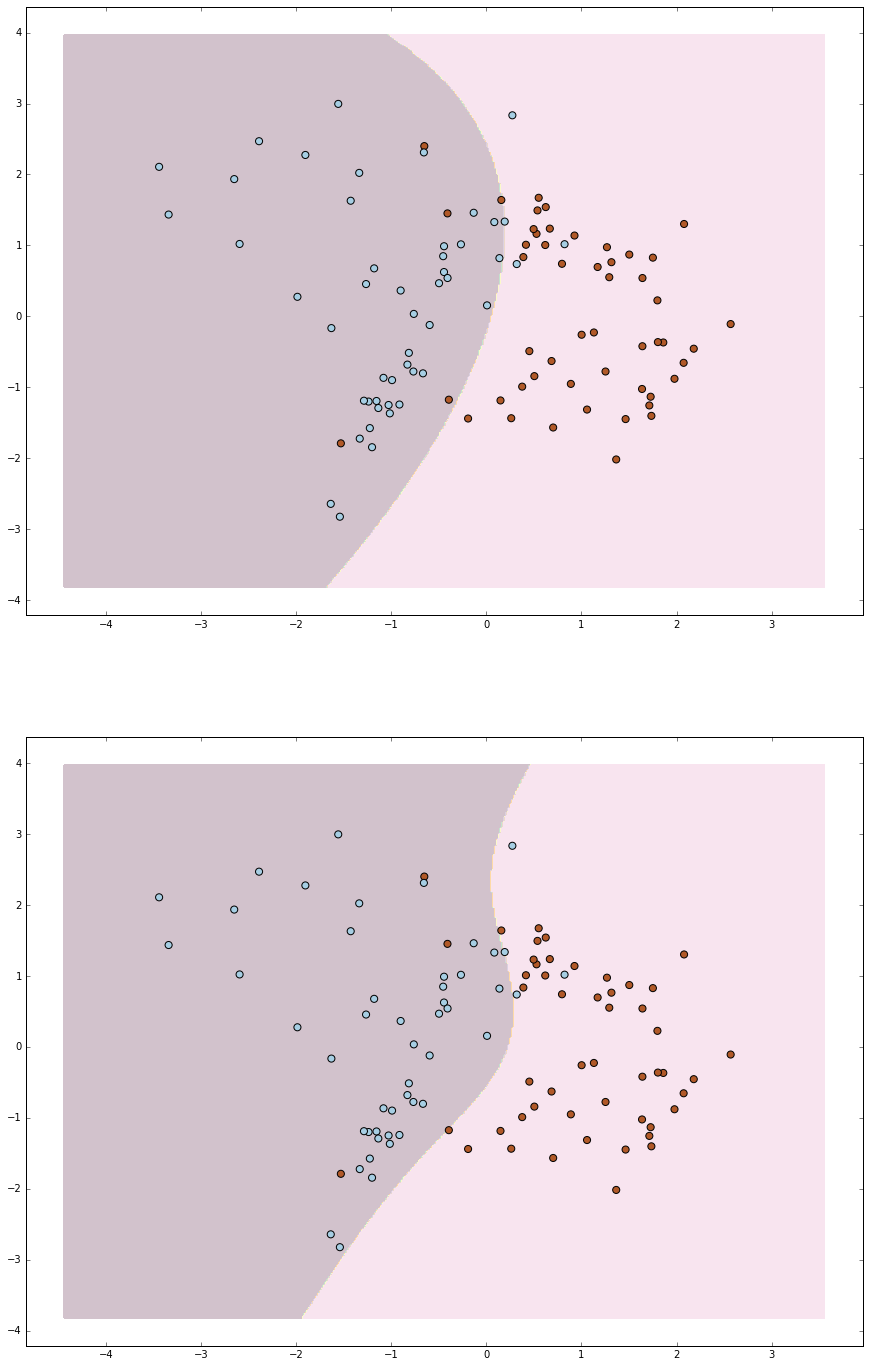

In [88]:
plt.figure(figsize=(15,24))
x_class, y_class = make_classification(n_features=2, n_redundant=0,n_informative=2,
                             n_clusters_per_class=2, n_classes=2)

poly = PolynomialFeatures(2)
design_matrix_2 = poly.fit_transform(x_class)
model_2 = LogisticRegression(penalty='l2', C = 1.0).fit(design_matrix_2,y_class)
y_predict_model_2 = model_2.predict(design_matrix_2)
subplot(211)
plot_2d_clf_problem(x_class, y_class, lambda x : model_2.predict(poly.transform(x)))


poly = PolynomialFeatures(3)
design_matrix_3 = poly.fit_transform(x_class)
model_3 = LogisticRegression(penalty='l2', C = 1.0).fit(design_matrix_3,y_class)
subplot(212)
plot_2d_clf_problem(x_class, y_class, lambda x : model_3.predict(poly.transform(x)))

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?

#### (b)

Podijelite skup podataka iz zadatka (a) na **skup za treniranje** i **skup za ispitivanje** u omjeru 7:3 (možete koristiti funkciju [`cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). Na skupu za učenje trenirajte model logističke regresije s polinomom četvrtog stupnja ($d=4$) kao funkcijom preslikavanja. Prikažite empirijsku pogrešku i pogrešku generalizacije u ovisnosti o faktoru regularizacije, i to kao funkciju parametra $C$ (inverz faktora regularizacije) za $C=2^\alpha$, gdje $\alpha\in\{-8,-7,\dots,7,8\}$.

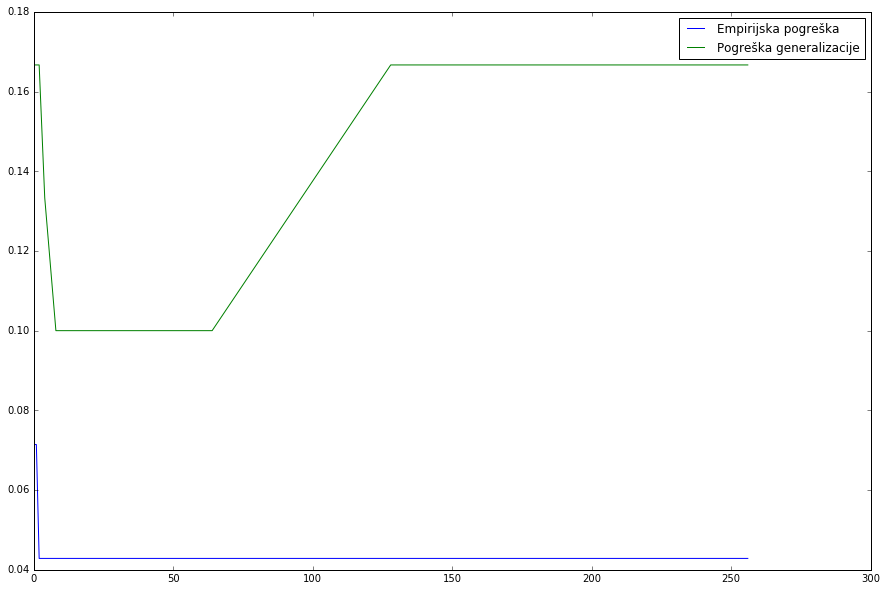

In [95]:
from sklearn import cross_validation
from sklearn.metrics import zero_one_loss

x_train, x_test, y_train, y_test = cross_validation.train_test_split(x_class, y_class,test_size=0.3)
poly = PolynomialFeatures(4)
design_matrix_4 = poly.fit_transform(x_train)
alfa_list = []
learning_error_list = []
testing_error_list = []
for alfa in range(-8,9): 
    C_m = 2**alfa
    alfa_list.append(C_m)
    model_4 = LogisticRegression(C = C_m).fit(design_matrix_4,y_train)
    y_train_predicted = model_4.predict(design_matrix_4)
    learning_error = zero_one_loss(y_train, y_train_predicted, normalize=True)
    learning_error_list.append(learning_error)
    y_test_predict = model_4.predict(poly.fit_transform(x_test))S
    testing_error = zero_one_loss(y_test,y_test_predict, normalize=True)
    testing_error_list.append(testing_error)
    
plt.figure(figsize=(15,10))
plt.plot(np.asarray(alfa_list),np.asarray(learning_error_list),label="Empirijska pogreška")
plt.plot(np.asarray(alfa_list),np.asarray(testing_error_list),label="Pogreška generalizacije")
plt.legend()
plt.show()

**Q:** Kojem dijelu u grafikonu odgovara prenaučenost, a kojem podnaučenost? Zašto?

**Q:** Koji biste faktor $\alpha$ odabrali i zašto?